In [1]:
%load_ext autoreload
%autoreload 2
from modelling import *
from models import * 
from params import * 
from utils import *
import matplotlib.pyplot as plt 
import missingno as msno
import matplotlib.pyplot as plt
from data_pipeline import * 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## creating output dir for Plots

In [2]:
output_dir = 'plots'
check_or_create_directory(output_dir)

Directory already exists: plots


In [3]:
data_class  = DataClass(use_prediction= False,use_enhanced="none",custom=True,augmented_data=False)
data_class.create_dataset()
modelling_data = DataModel(data = data_class,
                           use_enhanced= data_class.use_enhanced,
                           custom_test_index=data_class.enhanced_index,
                           max_len=100,
                           custom=True)
modelling_data.create_padding()


**************cleaning text ***********
**************augmenting data set disabled ***********
**************cleaning text ***********
Shape of training tensor:  (232, 100)
Shape of testing tensor:  (0, 100)


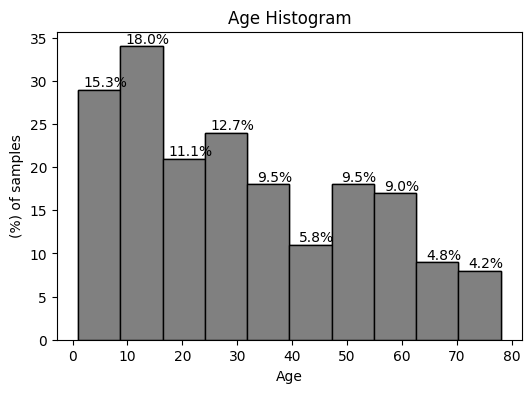

In [4]:
plt.figure(figsize=(6,4))
list_age = []
for age in data_class.data['age'].dropna():
    try :
        list_age.append(int(age[:2]))
    except:
        pass
counts, bins, _ = plt.hist(list_age, bins=10, color='skyblue', edgecolor='black', density=True)
percentage = counts / sum(counts) * 100
counts, bins, _ = plt.hist(list_age, bins=10, color='skyblue', edgecolor='black')

# Show the percentages on top of each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + 5, counts[i] , f'{percentage[i]:.1f}%', ha='center', va='bottom')
plt.hist(list_age, bins=10, color='grey', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('(%) of samples')
plt.title('Age Histogram')
plt.grid(False)
plt.savefig('plots/age_hist.png',bbox_inches = 'tight')

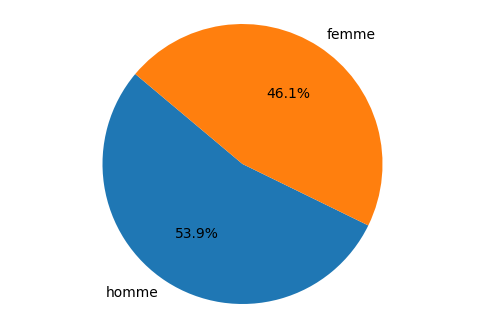

In [5]:
category_counts = data_class.data["sex"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('plots/sex_repartition.png',bbox_inches="tight")

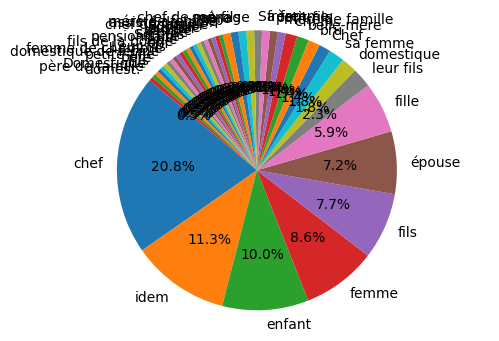

In [6]:
category_counts = data_class.data["link"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('plots/lin_repartition.png',bbox_inches="tight")

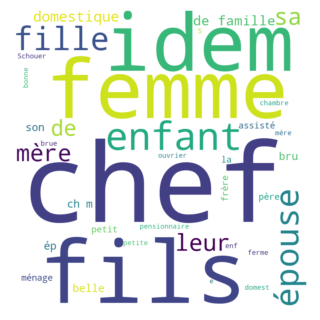

In [7]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(data_class.data['link'].dropna()))
                      
plt.figure(figsize=(5,3), facecolor=None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")  
plt.tight_layout(pad=0) 
plt.savefig(os.path.join(output_dir,'wordcloud_link.png'),bbox_inches = 'tight')


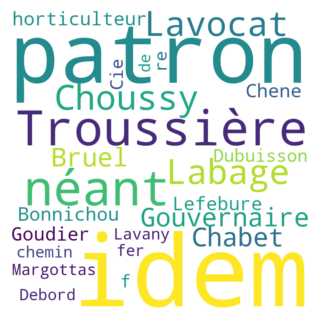

In [8]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(data_class.data['employer'].dropna()))
                      
plt.figure(figsize=(5,3), facecolor=None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")  
plt.tight_layout(pad=0) 
plt.savefig(os.path.join(output_dir,'wordcloud_employer.png'),bbox_inches = 'tight')


In [9]:
data_class  = DataClass(use_prediction= True,use_enhanced="none",custom=True,augmented_data=False)
data_class.create_dataset()
modelling_data = DataModel(data = data_class,
                           use_enhanced= data_class.use_enhanced,
                           custom_test_index=data_class.enhanced_index,
                           max_len=100,
                           custom=True)
modelling_data.create_padding()


**************cleaning text ***********
**************augmenting data set disabled ***********
**************cleaning text ***********
Shape of training tensor:  (205, 100)
Shape of testing tensor:  (27, 100)


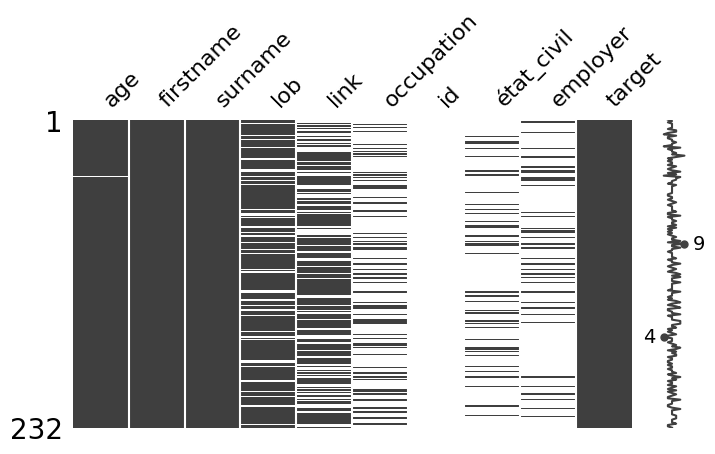

In [10]:
df = explode_column(data_class.data,'prediction',tags_prediction)
df = df[['age',
 'firstname',
 'surname',
 'lob',
 'link',
 'occupation',
 'id',
 'état_civil',
 'employer',
 'target']]
name = 'nan_matrix.png'
msno.matrix(df,figsize = (8,4),fontsize = 16)
# plt.tight_layout()
plt.savefig(os.path.join(os.path.join(output_dir), name),bbox_inches = 'tight')

In [12]:
results = pd.read_excel('results/results.xlsx',index_col = 0) 
results['missing_names'] = results['missing_names'].replace({'enhanced':'difflib'})
results['missing_names'] = results['missing_names'].replace({'none':'no correction'})
results

,accuracy_train,accuracy_test,model,custom,missing_names
0,100.000000,85.185185,bert,1,lstm
0,100.000000,77.777778,bert,1,fuzzy
0,100.000000,81.481481,bert,1,difflib
0,100.000000,77.777778,bert,1,no correction
0,96.129032,97.402597,bert,0,difflib
0,95.483871,98.701299,bert,0,lstm
0,96.129032,96.103896,bert,0,fuzzy
0,94.193548,94.805195,bert,0,no correction
0,95.609756,70.370370,knn,1,difflib
0,95.609756,62.962963,knn,1,no correction


In [13]:
results['diff_train_test'] = results['accuracy_test'] - results['accuracy_train']
custom_split = results[results['custom']==1]
not_custom_split = results[results['custom']==0]
order_list = ['benchmark','logreg','nb','knn','xgb','mlp','bert']
order_hue = ["lstm","difflib","fuzzy","no correction"]

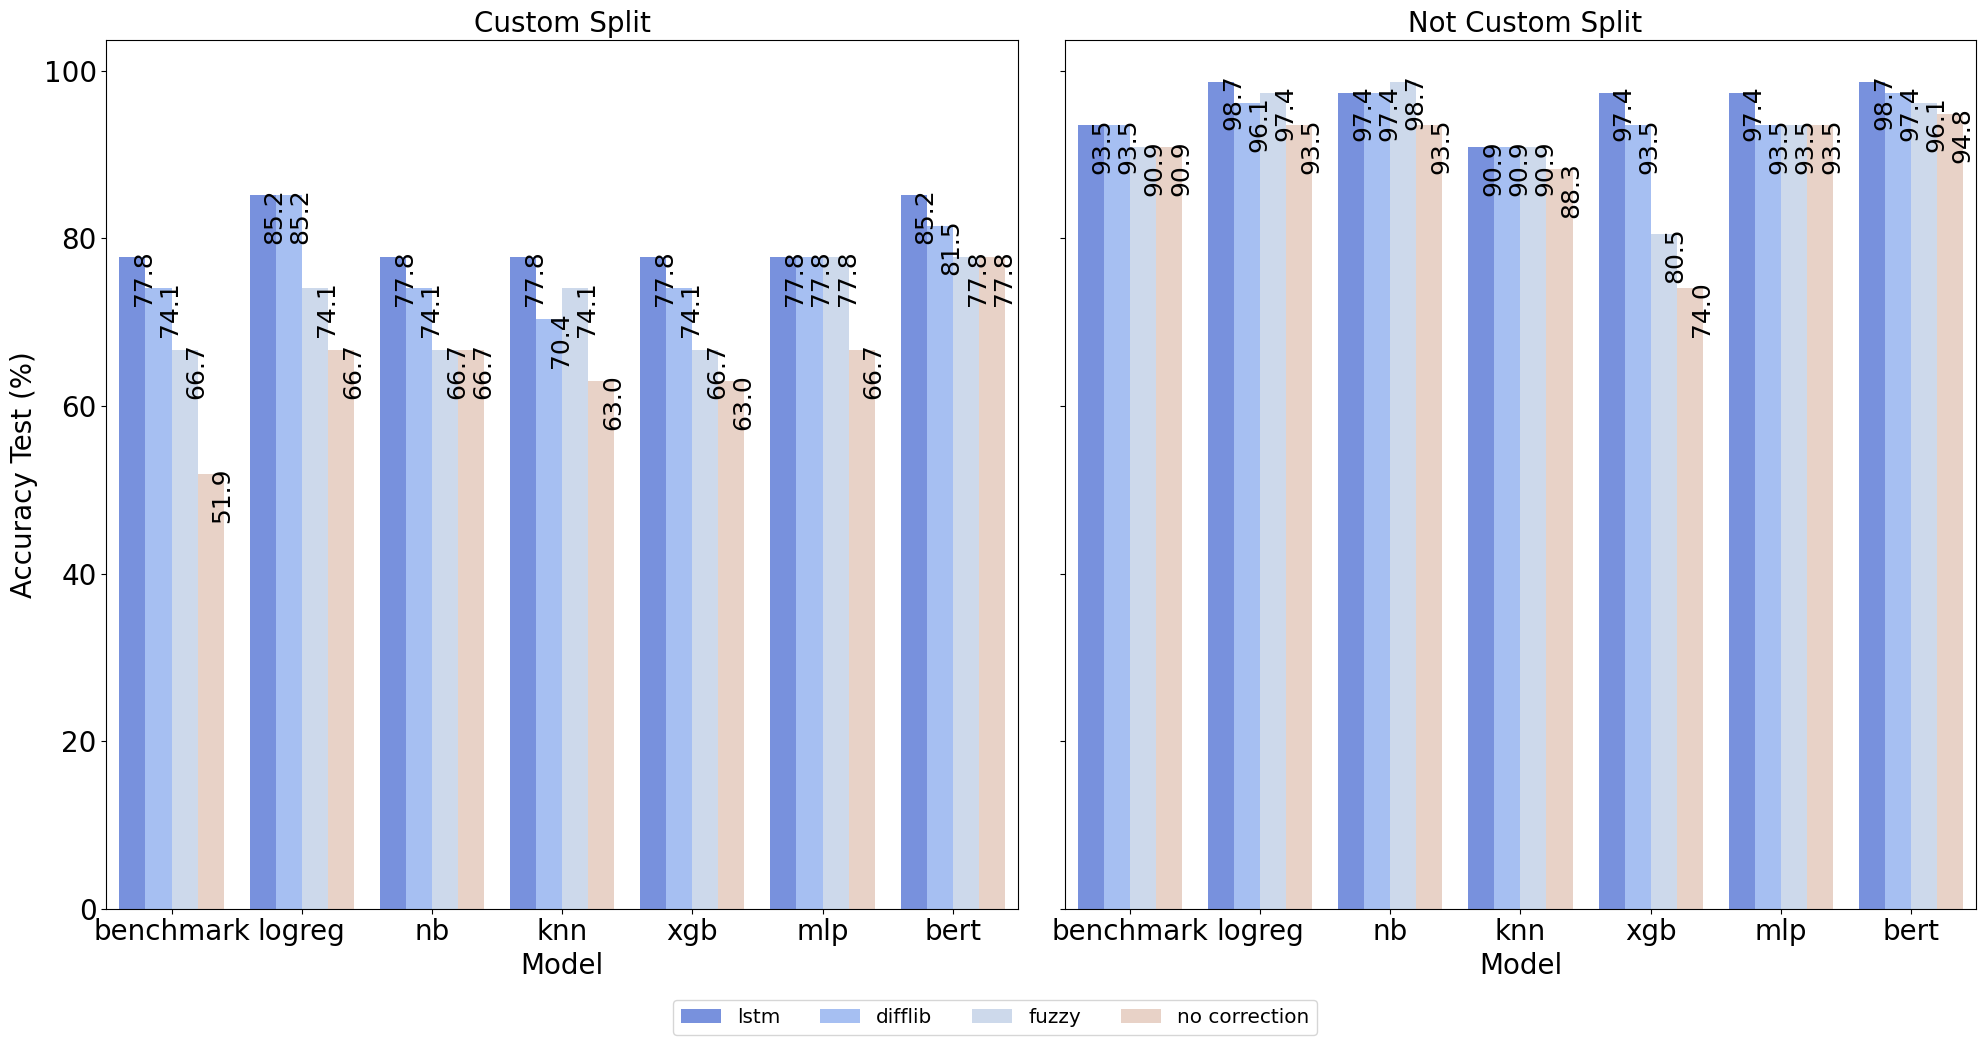

In [14]:
fig, axes = plt.subplots(nrows =1, ncols = 2, figsize=(20, 10), sharey=True)
sns.set_palette("coolwarm")
def add_labels(ax, data):
    max_accuracy_per_model = data.groupby('model')['accuracy_test'].max()
    for bar in ax.patches:
        height = bar.get_height()
        label_text = f'{height:.1f}'
        if label_text != "0.0":
            ax.annotate(label_text,
                        (bar.get_x() + bar.get_width() / 2, height),
                        va='top',
                        textcoords='offset points', xytext=(0, 5),  # Adjust these values as needed
                        fontsize=18,
                        rotation=90)

sns.barplot(ax=axes[0], data=custom_split, x='model', y='accuracy_test', hue='missing_names',order = order_list,
hue_order = order_hue)
axes[0].set_title('Custom Split', fontsize=20)
axes[0].set_ylabel('Accuracy Test (%)', fontsize=20)
axes[0].set_xlabel('Model', fontsize=20)
add_labels(axes[0], custom_split)

sns.barplot(ax=axes[1], data=not_custom_split, x='model', y='accuracy_test', hue='missing_names',order = order_list,
hue_order = order_hue)
axes[1].set_title(' Not Custom Split', fontsize=20)
axes[1].set_ylabel('Accuracy Test (%)', fontsize=20)
axes[1].set_xlabel('Model', fontsize=20)
add_labels(axes[1], not_custom_split)

handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels), fontsize='x-large')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].grid(False)
axes[1].grid(False)

for ax in axes :
    ax.tick_params(axis='both', which='major', labelsize=20)
fig.tight_layout()
fig.savefig('plots/accuracy_train.png',bbox_inches='tight')


## average gain per method

In [15]:
def diff(x):
    x = x.reset_index(level=0,drop=True)
    no_enhancement = x.loc['no correction'].iloc[0]
    x = x.drop('no correction')
    out = x - no_enhancement 
    return out
diff_custom_split_test = custom_split.set_index(['model','missing_names']).sort_index(level=0).groupby(level=0)[['accuracy_test']].apply(lambda x : diff(x)).reset_index()
diff_not_custom_split_test = not_custom_split.set_index(['model','missing_names']).sort_index(level=0).groupby(level=0)[['accuracy_test']].apply(lambda x : diff(x)).reset_index()

diff_custom_split_train = custom_split.set_index(['model','missing_names']).sort_index(level=0).groupby(level=0)[['accuracy_train']].apply(lambda x : diff(x)).reset_index()
diff_not_custom_split_train = not_custom_split.set_index(['model','missing_names']).sort_index(level=0).groupby(level=0)[['accuracy_train']].apply(lambda x : diff(x)).reset_index()

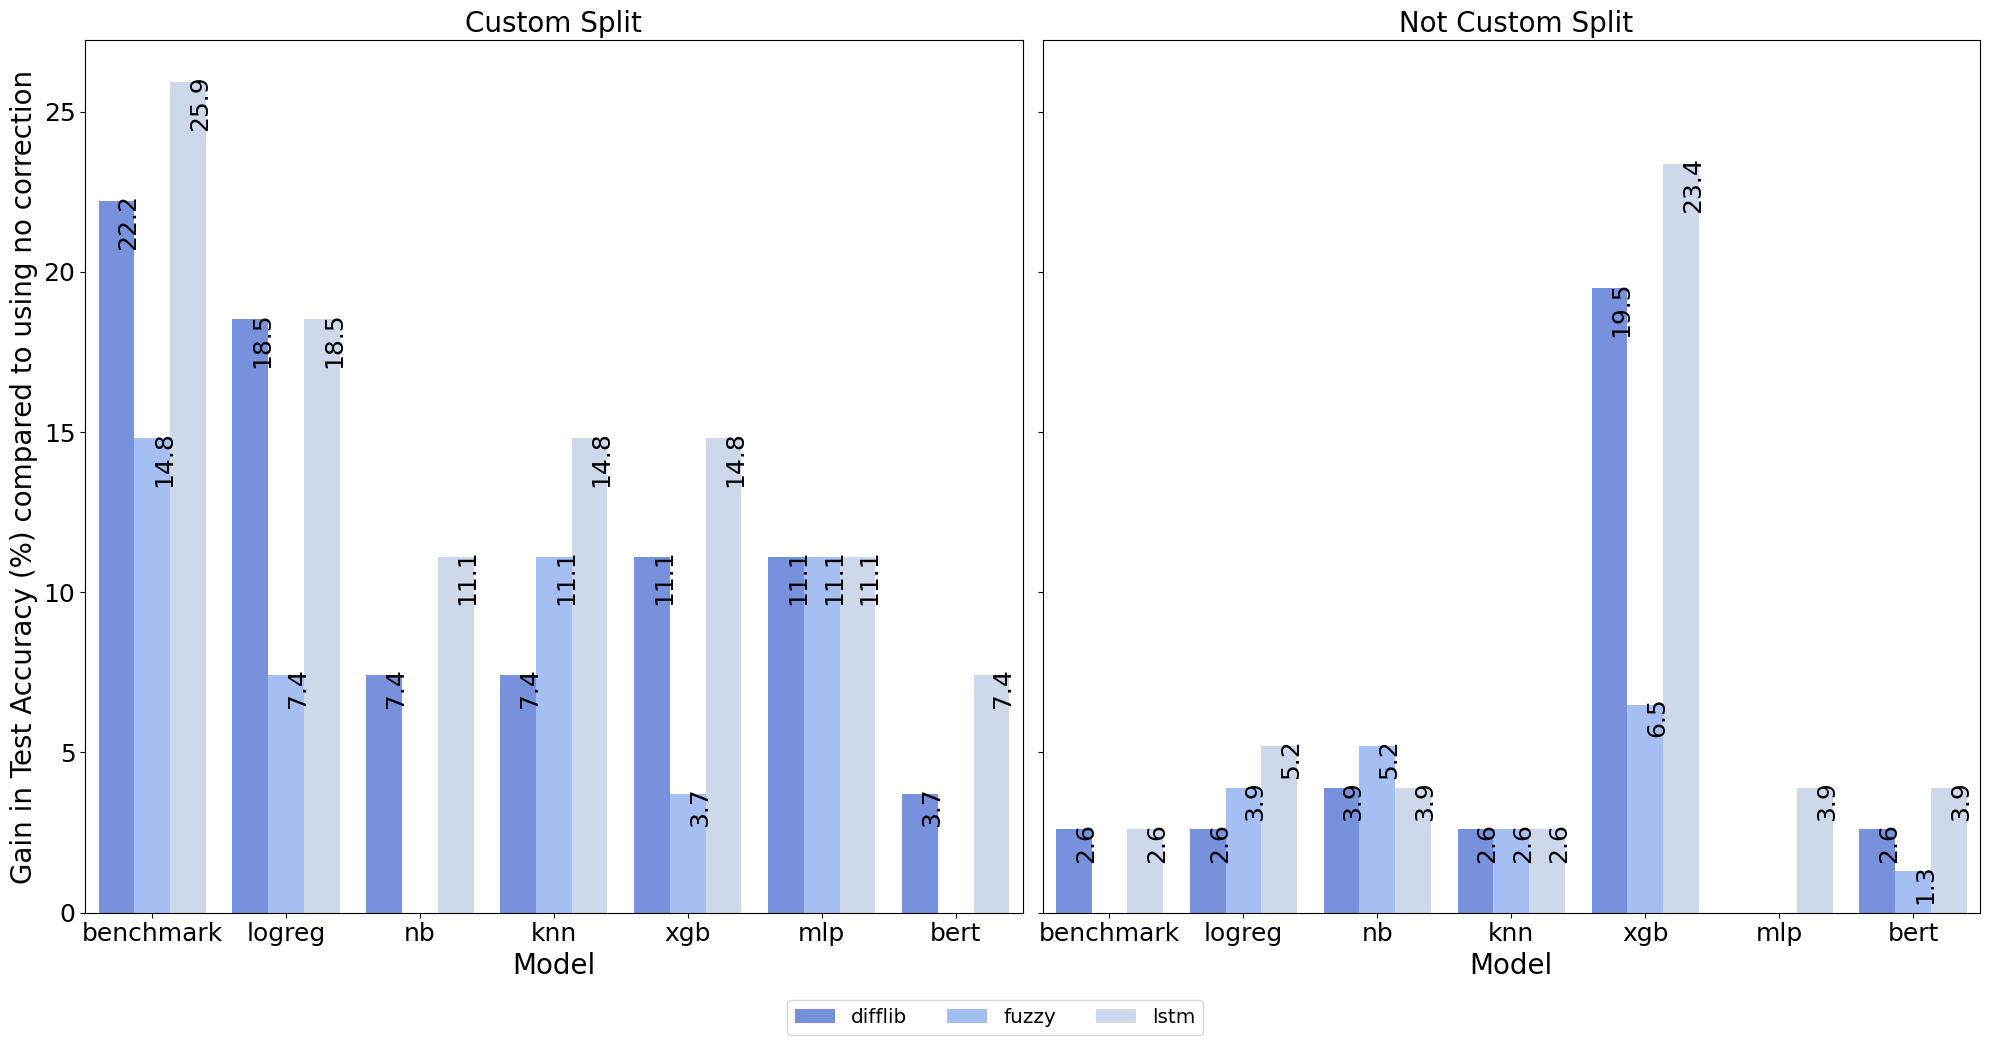

In [16]:
fig, axes = plt.subplots(nrows =1, ncols = 2, figsize=(20, 10), sharey=True)

sns.set_palette("coolwarm")

sns.barplot(ax=axes[0], data=diff_custom_split_test, x='model', y='accuracy_test', hue='missing_names',order = order_list)
axes[0].set_title('Custom Split', fontsize=20)
axes[0].set_ylabel('Gain in Test Accuracy (%) compared to using no correction', fontsize=20)
axes[0].set_xlabel('Model', fontsize=20)

add_labels(axes[0], diff_custom_split_test)

sns.barplot(ax=axes[1], data=diff_not_custom_split_test, x='model', y='accuracy_test', hue='missing_names',order = order_list)
axes[1].set_title(' Not Custom Split', fontsize=20)
axes[1].set_ylabel('Gain in Test Accuracy (%) compared to using no correction', fontsize=20)
axes[1].set_xlabel('Model', fontsize=20)
add_labels(axes[1], diff_not_custom_split_test)


handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels), fontsize='x-large')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
fig.tight_layout()


axes[0].tick_params(axis='x', labelsize=18)  # Set x-tick label size
axes[0].tick_params(axis='y', labelsize=18)  # Set y-tick label size
axes[1].tick_params(axis='x', labelsize=18)  # Set x-tick label size
axes[1].tick_params(axis='y', labelsize=18)  # Set y-tick label size


fig.tight_layout()
fig.savefig('plots/gain_correction_method.png',bbox_inches='tight')

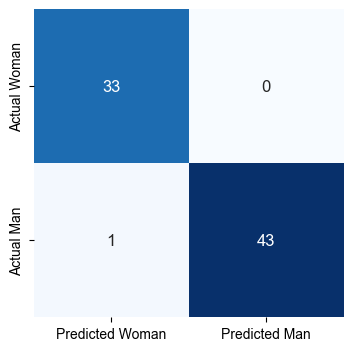

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def extract_table_results(model_name,custom,use_enhanced):
    path = f"results/{model_name}/{model_name}_{str(custom)}_{use_enhanced}.xlsx"
    table_results = pd.read_excel(path,index_col = 0)
    return table_results

def plot_confusion_matrix(model_name,custom,use_enhanced):

    table_results = extract_table_results(model_name,custom,use_enhanced)
    cm = confusion_matrix(table_results['TRUE'], table_results['PRED']) 
    fig, ax = plt.subplots(figsize=(4, 4)) 
    acc = np.round(accuracy_score(table_results['TRUE'], table_results['PRED']) *100,2)
    sns.set(style="whitegrid")
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Predicted Woman", "Predicted Man"], 
                yticklabels=["Actual Woman", "Actual Man"], ax=ax)
    # fig.suptitle(f"accuracy = {acc}")
    return fig


fig = plot_confusion_matrix('logreg',False,'lstm')
fig.savefig('plots/confusion_matrix_logreg_not_custom_lstm.png',bbox_inches = 'tight')

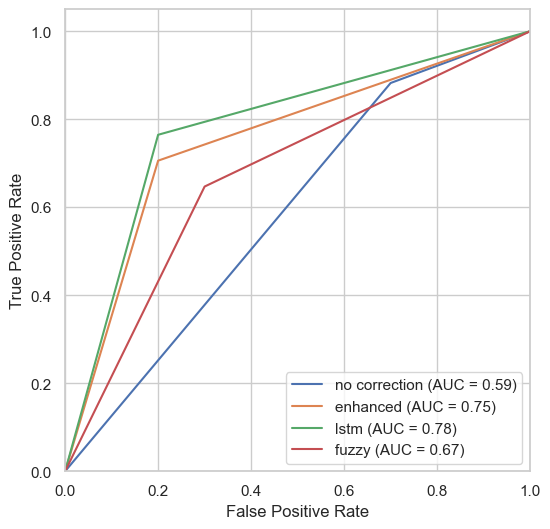

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(dataframes_dict,model : str = "mlp",custom = True):
    # Create figure object
    fig, ax = plt.subplots(figsize=(6, 6))
    
    for label, df in dataframes_dict.items():
        # Calculate the FPR and TPR for all thresholds of the classification
        fpr, tpr, threshold = roc_curve(df['TRUE'], df['PRED'])
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        ax.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    # ax.set_title(f'ROC curve on test set - {"Not" if not custom else ""} Custom test split - {str.upper(model)} model')
    ax.legend(loc="lower right")
    
    return fig

model_name = "logreg" 
custom = True
df_dict = {"no correction": extract_table_results(model_name,custom,"none"),
           "enhanced": extract_table_results(model_name,custom,"enhanced"),
           "lstm": extract_table_results(model_name,custom,"lstm"),
           "fuzzy": extract_table_results(model_name,custom,"fuzzy"),
           }
fig = plot_roc_curves(df_dict,model= model_name,custom = custom)
fig.savefig(os.path.join(output_dir,f"roc_curve_{model_name}_{str(custom)}.png"),bbox_inches = 'tight')

MLP architecture

In [19]:
%load_ext autoreload 
%autoreload 2
from models import *
model_socface = Model(data = modelling_data,model_name= "mlp")
model_socface.fit()
model_socface.predict()
model_socface.compute_results()
model_socface.results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Directory already exists: results\mlp
Epoch 1/100
6/6 - 1s - loss: 0.7097 - accuracy: 0.5122 - val_loss: 0.8216 - val_accuracy: 0.4878 - 1s/epoch - 246ms/step
Epoch 2/100
6/6 - 0s - loss: 0.7749 - accuracy: 0.4939 - val_loss: 0.6814 - val_accuracy: 0.5122 - 291ms/epoch - 48ms/step
Epoch 3/100


KeyboardInterrupt: 

In [ ]:
history = model_socface.model.history

# Creating a figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='upper left')

# Plotting training and validation loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')

fig.tight_layout()
fig.savefig('plots/history_mlp.png',bbox_inches = 'tight')

diff train test

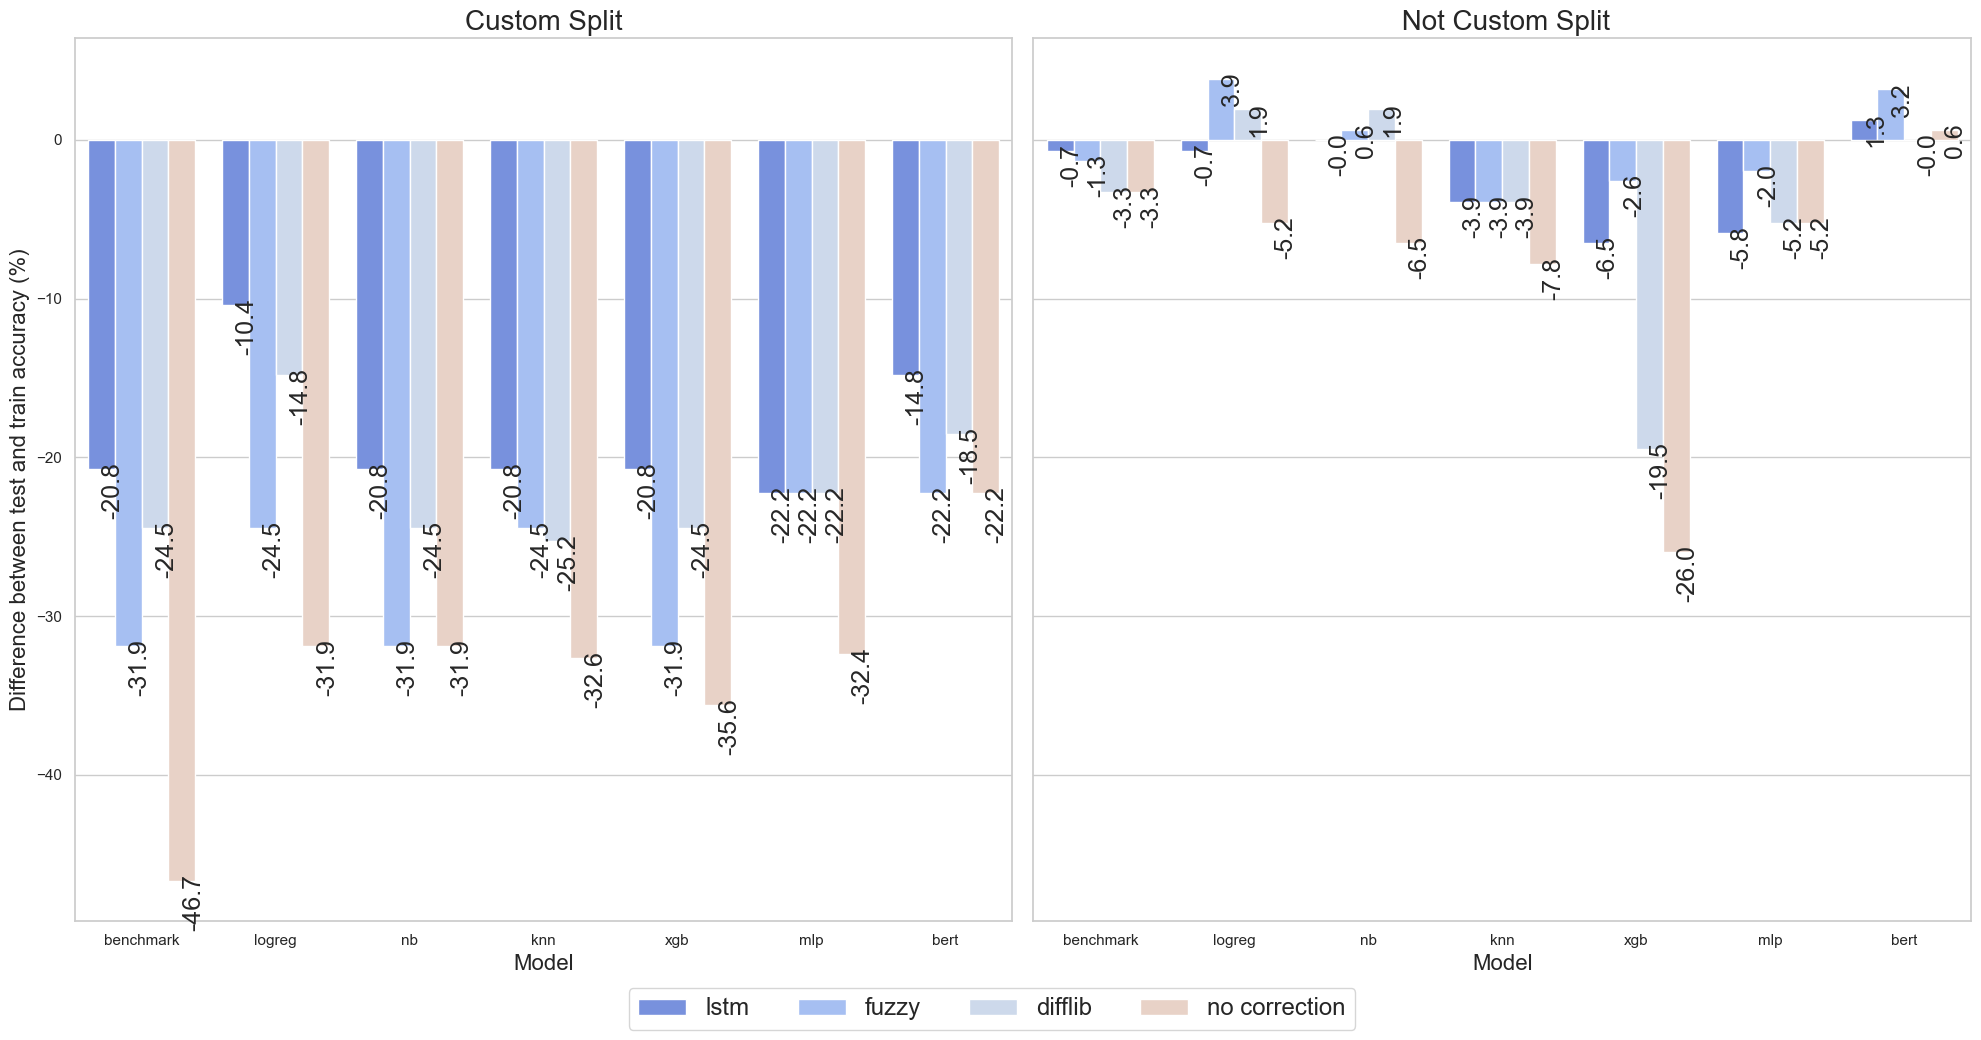

In [20]:
fig, axes = plt.subplots(nrows =1, ncols = 2, figsize=(20, 10), sharey=True)

sns.set_palette("coolwarm")

sns.barplot(ax=axes[0], data=custom_split, x='model', y='diff_train_test', hue='missing_names',order = order_list)
axes[0].set_title('Custom Split', fontsize=20)
axes[0].set_ylabel('Difference between test and train accuracy (%)', fontsize=16)
axes[0].set_xlabel('Model', fontsize=16)
add_labels(axes[0], custom_split)

sns.barplot(ax=axes[1], data=not_custom_split, x='model', y='diff_train_test', hue='missing_names',order = order_list)
axes[1].set_title(' Not Custom Split', fontsize=20)
axes[1].set_ylabel('Difference between test and train accuracy (%)', fontsize=16)
axes[1].set_xlabel('Model', fontsize=16)
add_labels(axes[1], not_custom_split)


handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels), fontsize='x-large')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
fig.tight_layout()
fig.savefig('plots/diff_train_test.png',bbox_inches = 'tight')

LSTM history plot

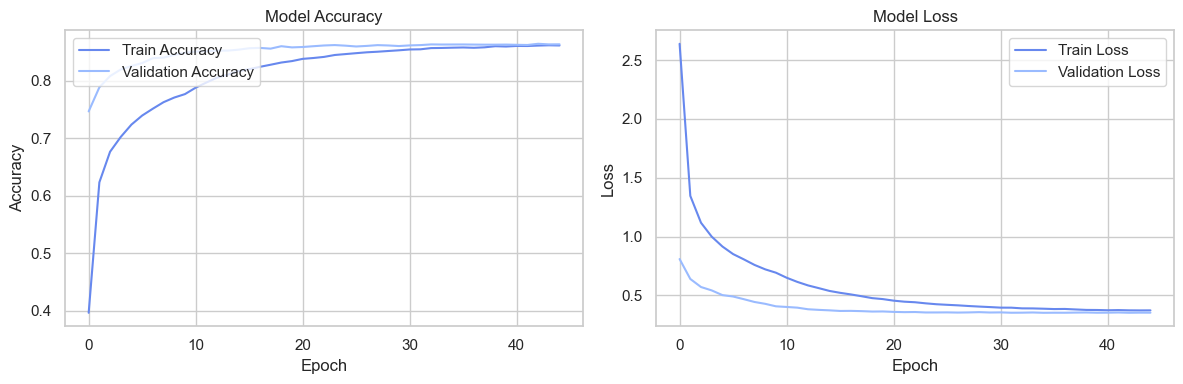

In [21]:
lstm_history = pd.read_excel('model_misspelling/history.xlsx',index_col = 0)

history = lstm_history

# Creating a figure
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plotting training and validation accuracy
axs[0].plot(history['accuracy'], label='Train Accuracy')
axs[0].plot(history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='upper left')

# Plotting training and validation loss
axs[1].plot(history['loss'], label='Train Loss')
axs[1].plot(history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')

fig.tight_layout()
fig.savefig('plots/training_bilstm.png',bbox_inches = 'tight')

Table results

In [22]:

table = results.copy()
table['custom'] = table['custom'].replace({1:"custom split",0:"not custom split"})
table = table.set_index(["model","custom","missing_names"])
new_index = pd.MultiIndex.from_product([order_list, table.index.levels[1],table.index.levels[2]], names=table.index.names)
table = table.reindex(new_index)
table.index.names = ['Model',"custom split","correction method"]
table = table[["accuracy_train","accuracy_test"]]

print(table.round(2).to_latex())

\begin{tabular}{lllrr}
\toprule
 &  &  & accuracy_train & accuracy_test \\
Model & custom split & correction method &  &  \\
\midrule
\multirow[t]{8}{*}{benchmark} & \multirow[t]{4}{*}{custom split} & difflib & 98.540000 & 74.070000 \\
 &  & fuzzy & 98.540000 & 66.670000 \\
 &  & lstm & 98.540000 & 77.780000 \\
 &  & no correction & 98.540000 & 51.850000 \\
\cline{2-5}
 & \multirow[t]{4}{*}{not custom split} & difflib & 94.190000 & 93.510000 \\
 &  & fuzzy & 94.190000 & 90.910000 \\
 &  & lstm & 94.840000 & 93.510000 \\
 &  & no correction & 94.190000 & 90.910000 \\
\cline{1-5} \cline{2-5}
\multirow[t]{8}{*}{logreg} & \multirow[t]{4}{*}{custom split} & difflib & 100.000000 & 85.190000 \\
 &  & fuzzy & 98.540000 & 74.070000 \\
 &  & lstm & 95.610000 & 85.190000 \\
 &  & no correction & 98.540000 & 66.670000 \\
\cline{2-5}
 & \multirow[t]{4}{*}{not custom split} & difflib & 96.770000 & 96.100000 \\
 &  & fuzzy & 95.480000 & 97.400000 \\
 &  & lstm & 94.840000 & 98.700000 \\
 &  & no corr

In [23]:
table

accuracy_train  accuracy_test
Model     custom split     correction method                               
benchmark custom split     difflib                 98.536585      74.074074
                           fuzzy                   98.536585      66.666667
                           lstm                    98.536585      77.777778
                           no correction           98.536585      51.851852
          not custom split difflib                 94.193548      93.506494
                           fuzzy                   94.193548      90.909091
                           lstm                    94.838710      93.506494
                           no correction           94.193548      90.909091
logreg    custom split     difflib                100.000000      85.185185
                           fuzzy                   98.536585      74.074074
                           lstm                    95.609756      85.185185
                           no correction           98.536585      66.666667
          not custom split difflib                 96.774194      96.103896
                           fuzzy                   95.483871      97.402597
                           lstm                    94.838710      98.701299
                           no correction           98.709677      93.506494
nb        custom split     difflib                 98.536585      74.074074
                           fuzzy                   98.536585      66.666667
                           lstm                    98.536585      77.777778
                           no correction           98.536585      66.666667
          not custom split difflib                 97.419355      97.402597
                           fuzzy                   96.774194      98.701299
                           lstm                    96.774194      97.402597
                           no correction          100.000000      93.506494
knn       custom split     difflib                 95.609756      70.370370
                           fuzzy                   98.536585      74.074074
                           lstm                    98.536585      77.777778
                           no correction           95.609756      62.962963
          not custom split difflib                 94.838710      90.909091
                           fuzzy                   94.838710      90.909091
                           lstm                    94.838710      90.909091
                           no correction           96.129032      88.311688
xgb       custom split     difflib                 98.536585      74.074074
                           fuzzy                   98.536585      66.666667
                           lstm                    98.536585      77.777778
                           no correction           98.536585      62.962963
          not custom split difflib                100.000000      93.506494
                           fuzzy                  100.000000      80.519481
                           lstm                   100.000000      97.402597
                           no correction          100.000000      74.025974
mlp       custom split     difflib                100.000000      77.777779
                           fuzzy                  100.000000      77.777779
                           lstm                   100.000000      77.777779
                           no correction           99.024391      66.666669
          not custom split difflib                 99.354839      93.506491
                           fuzzy                   98.709679      93.506491
                           lstm                    99.354839      97.402596
                           no correction           98.709679      93.506491
bert      custom split     difflib                100.000000      81.481481
                           fuzzy                  100.000000      77.777778
                           lstm                   100.000000      85.185185
                  

Word of cloud  - for the sequence

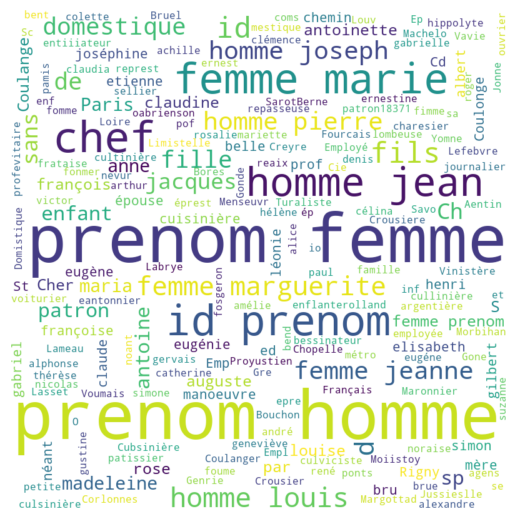

In [24]:

from wordcloud import WordCloud

df = modelling_data.train
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['message']))
                      
plt.figure(figsize=(5, 5), facecolor=None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")  
plt.tight_layout(pad=0) 
plt.savefig(os.path.join(output_dir,'wordcloud.png'),bbox_inches = 'tight')


In [35]:
data_class  = DataClass(use_prediction= True,use_enhanced="none",custom=True,augmented_data=False)
data_class.create_dataset()
modelling_data = DataModel(data = data_class,
                           use_enhanced= data_class.use_enhanced,
                           custom_test_index=data_class.enhanced_index,
                           max_len=100,
                           custom=True)
modelling_data.create_padding()

data_class_groundtruth  = DataClass(use_prediction= False,use_enhanced="none",custom=True,augmented_data=False)
data_class_groundtruth.create_dataset()



**************cleaning text ***********
**************augmenting data set disabled ***********
**************cleaning text ***********
Shape of training tensor:  (205, 100)
Shape of testing tensor:  (27, 100)
**************cleaning text ***********
**************augmenting data set disabled ***********
**************cleaning text ***********


In [82]:
from lstm_mispelling import *
words = data_class.data.sample(5)['firstname_lower'].values.tolist()
results = pd.DataFrame(columns = words)
original = []
altered = []
for word in words:
    altered_word = alter_word(word)

    results[word] = altered_word
results.index = [f'Alteration {i+1}' for i in range(results.shape[0])]
results.columns.name = 'Original First Name'
results.index.name = 'Alteration'
results

Original First Name,jean,madeleine,marie,louis,jeanne
Alteration,,,,,
Alteration 1,jpau,madblsine,merie,ligis,jeangd
Alteration 2,cean,modeleine,mazie,louzs,joanne
Alteration 3,jen,madeline,arie,luis,jenne
Alteration 4,ja,mdeline,are,los,jean


In [83]:
print(results.to_latex())

\begin{tabular}{llllll}
\toprule
Original First Name & jean & madeleine & marie & louis & jeanne \\
Alteration &  &  &  &  &  \\
\midrule
Alteration 1 & jpau & madblsine & merie & ligis & jeangd \\
Alteration 2 & cean & modeleine & mazie & louzs & joanne \\
Alteration 3 & jen & madeline & arie & luis & jenne \\
Alteration 4 & ja & mdeline & are & los & jean \\
\bottomrule
\end{tabular}



In [34]:
data_class  = DataClass(use_prediction= True,use_enhanced="lstm",custom=True,augmented_data=False)
data_class.create_dataset()
modelling_data = DataModel(data = data_class,
                           use_enhanced= data_class.use_enhanced,
                           custom_test_index=data_class.enhanced_index,
                           max_len=100,
                           custom=True)
modelling_data.create_padding()

data_class_groundtruth  = DataClass(use_prediction= False,use_enhanced="none",custom=True,augmented_data=False)
data_class_groundtruth.create_dataset()



modifying features
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower_lstm']
**************cleaning text ***********
**************augmenting data set disabled ***********
modifying features
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower_lstm']
**************cleaning text ***********
Shape of training tensor:  (205, 100)
Shape of testing tensor:  (27, 100)
**************cleaning text ***********
**************augmenting data set disabled ***********
**************cleaning text ***********


In [26]:
left = data_class_groundtruth.data.loc[data_class.enhanced_index][['firstname']]
left.columns = ['Firstname groundtruth']
right = data_class.data.loc[data_class.enhanced_index][['firstname','firstname_lower_lstm']]
right.columns = ['Transcripted firstname from groudntruth', 'Corrected Firstname with BiLSTM']
right['Corrected Firstname with BiLSTM'] = right['Corrected Firstname with BiLSTM'].str.replace('prenom homme', '', regex=False)
right['Corrected Firstname with BiLSTM'] = right['Corrected Firstname with BiLSTM'].str.replace('prenom femme', '', regex=False)
right

,Transcripted firstname from groudntruth,Corrected Firstname with BiLSTM
18,Angène,angèle
24,Herandre,alexandre
25,Oarguerite,marguerite
34,Vigmie,virginie
65,Angloise,angeline
69,Feris,felix
82,Jregues,jacques
104,Gilbeuse,gilberte
121,Branistau,francisque
126,Mamiolas,mathias


In [27]:
print(left.join(right).to_latex())

\begin{tabular}{llll}
\toprule
 & Firstname groundtruth & Transcripted firstname from groudntruth & Corrected Firstname with BiLSTM \\
\midrule
18 & Antoine & Angène &  angèle \\
24 & Alexandre & Herandre &  alexandre \\
25 & Marguerite & Oarguerite &  marguerite \\
34 & Virginie & Vigmie &  virginie \\
65 & Antoine & Angloise &  angeline \\
69 & François & Feris &  felix \\
82 & Jacques & Jregues &  jacques \\
104 & Gilbert & Gilbeuse &  gilberte \\
121 & Branislav & Branistau &  francisque \\
126 & Stanislas & Mamiolas &  mathias \\
132 & Madeleine & Gadeleine &  madeleine \\
138 & Etiennette & Ctiennette &  etiennette \\
142 & Antoine & Aupène &  eugène \\
147 & Claude & Clause &  claude \\
159 & Gilbert & Gilbeup &  gilbert \\
193 & Marthe & Marthy &  marthe \\
197 & Françoise & Faul &  paul \\
200 & François & Zean &  jean \\
216 & Victor & Vicher &  victor \\
217 & Madeleine & Mareleine &  marceline \\
219 & France & Franco &  francois \\
225 & Blaise & Clause &  claude \\
231 & 

In [28]:

models = ["logreg"]
customs = [ True]
misspelling_method = ["enhanced", "lstm"]
all_results = {}
for custom in customs:
    for method in misspelling_method:
        data_class = DataClass(
            use_prediction=True, use_enhanced=method, custom=custom,
            augmented_data=False,
            augmented_size=2000
        )
        data_class.create_dataset()
        modelling_data = DataModel(
            data=data_class,
            use_enhanced=data_class.use_enhanced,
            custom_test_index=data_class.enhanced_index,
            max_len=100,
            custom=data_class.custom,
        )
        modelling_data.create_padding()
        for model in tqdm(models):
            model_socface = Model(data=modelling_data, model_name=model)
            model_socface.fit()
            model_socface.predict()
            model_socface.compute_results()
            print(model_socface.results)
            all_results[method] = model_socface.model.table_results


modifying features
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower_enhanced']
**************cleaning text ***********
**************augmenting data set disabled ***********
modifying features
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower_enhanced']
**************cleaning text ***********
Shape of training tensor:  (205, 100)
Shape of testing tensor:  (27, 100)


  0%|          | 0/1 [00:00<?, ?it/s]

Directory already exists: results\logreg
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ..........................clf__C=1, clf__penalty=l1; total time=   0.0s
[CV] END

100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


[CV] END .........................clf__C=10, clf__penalty=l2; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l2; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l2; total time=   0.0s
results computed and table results saved
  accuracy_train accuracy_test   model custom missing_names
0      98.536585     74.074074  logreg      1      enhanced
modifying features
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower_lstm']
**************cleaning text ***********
**************augmenting data set disabled ***********
modifying features
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower_lstm']
**************cleaning text ***********
Shape of training tensor:  (205, 100)
Shape of testing tensor:  (27, 100)


  0%|          | 0/1 [00:00<?, ?it/s]

Directory already exists: results\logreg
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   0.0s
[CV] END ..........................clf__C=1, clf__penalty=l1; total time=   0.0s
[CV] END

100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

[CV] END .........................clf__C=10, clf__penalty=l1; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l1; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l1; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l2; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l2; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l2; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l2; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l2; total time=   0.0s
results computed and table results saved
  accuracy_train accuracy_test   model custom missing_names
0      98.536585     77.777778  logreg      1          lstm


In [29]:
pd.concat(all_results,axis=1)

enhanced      lstm     
        PRED TRUE PRED TRUE
219        1    0    1    0
34         0    0    0    0
65         1    1    0    1
217        0    0    0    0
159        1    1    1    1
132        0    0    0    0
193        0    0    0    0
225        1    1    1    1
216        1    1    1    1
200        1    1    1    1
142        0    1    1    1
233        0    1    0    1
18         0    1    0    1
69         1    1    1    1
197        1    0    1    0
24         1    1    1    1
126        1    1    1    1
232        1    1    1    1
234        1    1    1    1
231        0    0    0    0
121        0    1    1    1
104        0    1    0    1
236        0    0    0    0
82         1    1    1    1
25         0    0    0    0
138        0    0    0    0
147        1    1    1    1